# Exam: Getting Started

This notebook accompanies the 2021 exam in Advanced Microeconometrics. You are not required to use this notebook, it is purely to help you get started with the data. 

**Note:** Make sure that you put the two files, `cross_section.csv` and `panel.csv`, are in the same directory as this notebook. 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

import sml as sml
import estimation as est

# Cross-sectional dataset

This dataset just has the variables, `y`, `x1` (the constant), `x2` (the binary variable), and `x3` (the continuous variable). 

In [2]:
cs = pd.read_csv('cross_section.csv')
cs.head(5)

,y,x1,x2,x3
0,1.383056,1.0,1.0,0.087482
1,-0.083102,1.0,1.0,0.227310
2,1.260095,1.0,0.0,0.314377
3,4.212061,1.0,0.0,0.174766
4,0.620480,1.0,1.0,0.607094


Let us have a very raw look at the data, splitting on the binary variable and plotting over the continuous. 

c:\Users\JBH\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


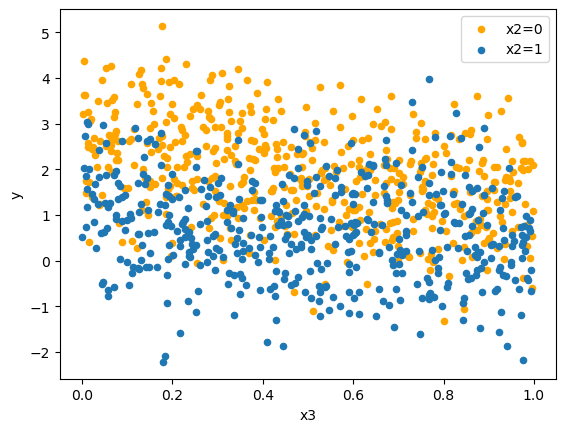

In [3]:
fig,ax = plt.subplots(); 
cs[cs.x2==0].plot.scatter(x='x3', y='y', ax=ax, label='x2=0', color='orange');
cs[cs.x2==1].plot.scatter(x='x3', y='y', ax=ax, label='x2=1');

In [4]:
# convert to numpy arrays 
y = cs['y'].values
x = cs[['x1', 'x2', 'x3']].values

In [5]:
N,K = x.shape

# Panel dataset

This dataset contains $N=100$ individuals observed for $T = 10$ periods. In addition to the variables `y`, `x1`, `x2`, `x3`, this dataset also contains the variable `i` (denoting individuals), and `t` (denoting time). You do not need to use `i` and `t` in your code; it is included to help make clear the panel structure and the sorting of the dataset.  

In [6]:
p = pd.read_csv('panel.csv')
p.head(12)

,i,t,y,x1,x2,x3
0,0,0,1.179576,1.0,1.0,0.087482
1,0,1,1.247117,1.0,1.0,0.227310
2,0,2,2.031343,1.0,0.0,0.314377
3,0,3,1.914893,1.0,0.0,0.174766
4,0,4,0.109162,1.0,1.0,0.607094
5,0,5,0.683711,1.0,1.0,0.413586
6,0,6,0.648328,1.0,1.0,0.816352
7,0,7,0.597955,1.0,1.0,0.185130
8,0,8,0.784681,1.0,1.0,0.701877
9,0,9,1.974238,1.0,0.0,0.240356


Let us have a very raw look at the data, splitting on the binary variable and plotting over the continuous. 

c:\Users\JBH\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


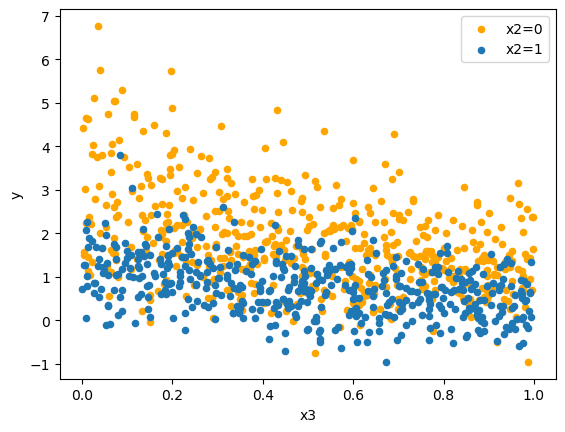

In [7]:
fig,ax = plt.subplots(); 
p[p.x2==0].plot.scatter(x='x3', y='y', ax=ax, label='x2=0', color='orange');
p[p.x2==1].plot.scatter(x='x3', y='y', ax=ax, label='x2=1');

Note that the dataset is sorted in such a way that when we use `.reshape(N,T)` on a column, we get that each row contains the $T$ observations belonging to that individual. 

In [8]:
N = p['i'].nunique() # no. unique values of personal identifier 
T = p['t'].nunique() # no. unique values of tim 
x_vars = ['x1', 'x2', 'x3']
K = len(x_vars)

# extract as numpy objects 
y = p['y'].values.reshape(N,T) # (N,T) array 
x = p[x_vars].values.reshape(N,T,K) # (N,T,K) array 

# depending on your coding preferences, you may choose to work 
# with the data in "tall" N*T arrays; here is how: 
y = y.reshape(N*T, )
x = x.reshape(N*T, K)

In [9]:
x.shape

(1000, 3)

In [10]:
theta_start = np.array([0, 0, 1])

In [11]:
theta_start

array([0, 0, 1])

In [12]:
theta_lab = ['beta1', 'beta2', 'beta3', 'sigma_u']

In [13]:
betao = np.array([1.,1., 1.])
K = betao.size
sigma_c = 1.
sigma_u = 1.
thetao = np.append(betao, sigma_u).reshape(-1,1)

In [14]:
thetao

array([[1.],
       [1.],
       [1.],
       [1.]])

In [15]:
np.exp(-(x@betao)).shape

(1000,)

In [16]:
x.shape

(1000, 3)

In [17]:
-sml.loglikelihood_non_linear_panel(thetao, y, x)

array([5.57121065e-01, 6.49000799e-01, 1.55355784e+00, 1.28962070e+00,
       6.27054164e-04, 1.76546789e-01, 1.73168684e-01, 1.17851238e-01,
       2.57476203e-01, 1.41953935e+00, 3.31585426e+00, 1.93349555e-02,
       9.69318747e+00, 2.45505416e+00, 2.50781718e-01, 1.70307231e+00,
       4.06877911e+00, 7.07373960e-01, 1.86798206e+00, 2.52313657e+00,
       5.35765211e-01, 7.52329940e-01, 3.78049768e-01, 2.71327036e+00,
       6.33070430e-01, 5.79085872e+00, 5.83112627e+00, 6.91324266e+00,
       9.85059973e-01, 4.49099694e+00, 1.58905436e-01, 6.20125668e-02,
       1.03853100e-01, 1.28655248e-01, 2.06833814e-01, 1.82250633e-01,
       3.68950880e-01, 1.21714413e-02, 2.96421800e-01, 4.33731770e-01,
       3.06630430e-01, 4.18614545e-02, 3.13074816e-01, 2.29969331e-01,
       9.23921203e-01, 2.12873204e-01, 9.22686791e-01, 3.84035447e-01,
       3.02274629e-01, 1.80724682e+00, 3.48745184e+00, 3.68080724e-01,
       1.58482533e+00, 2.65317300e+00, 6.30230288e-01, 3.11819480e+00,
      

In [18]:
q = lambda theta,y,x : sml.q2(theta, y, x)
res = est.estimate(q, thetao, y, x)

Optimization terminated successfully.
         Current function value: 0.328649
         Iterations: 18
         Function evaluations: 150
         Gradient evaluations: 30


In [98]:
beta = theta_start[:-1]